In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telco_churndf = pd.read_csv('Datasets/Telco_Customer_Churn.csv')
telco_churndf.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
telco_churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
telco_churndf['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [5]:
telco_churndf['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

##### Handling Categorical Values
    
    * Must be converted to numerical labels using label encoder, one-hot encoding.
    * label Encoder is used for mapping categorical values to 0,1,2,3,4...

In [6]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [7]:
telco_churndf['gender'] = le_encoder.fit_transform(telco_churndf['gender'])

In [8]:
telco_churndf['Partner'] = le_encoder.fit_transform(telco_churndf['Partner'])

In [9]:
telco_churndf['Dependents'] = le_encoder.fit_transform(telco_churndf['Dependents'])
telco_churndf['PhoneService'] = le_encoder.fit_transform(telco_churndf['PhoneService'])
telco_churndf['MultipleLines'] = le_encoder.fit_transform(telco_churndf['MultipleLines'])
telco_churndf['InternetService'] = le_encoder.fit_transform(telco_churndf['InternetService'])
telco_churndf['OnlineSecurity'] = le_encoder.fit_transform(telco_churndf['OnlineSecurity'])
telco_churndf['OnlineBackup'] = le_encoder.fit_transform(telco_churndf['OnlineBackup'])
telco_churndf['DeviceProtection'] = le_encoder.fit_transform(telco_churndf['DeviceProtection'])
telco_churndf['TechSupport'] = le_encoder.fit_transform(telco_churndf['TechSupport'])
telco_churndf['StreamingTV'] = le_encoder.fit_transform(telco_churndf['StreamingTV'])
telco_churndf['StreamingMovies'] = le_encoder.fit_transform(telco_churndf['StreamingMovies'])
telco_churndf['Contract'] = le_encoder.fit_transform(telco_churndf['Contract'])
telco_churndf['PaperlessBilling'] = le_encoder.fit_transform(telco_churndf['PaperlessBilling'])
telco_churndf['PaymentMethod'] = le_encoder.fit_transform(telco_churndf['PaymentMethod'])
telco_churndf['PaperlessBilling'] = le_encoder.fit_transform(telco_churndf['PaperlessBilling'])
telco_churndf['Churn'] = le_encoder.fit_transform(telco_churndf['Churn'])

In [10]:
telco_churndf.loc[telco_churndf['TotalCharges'] == ' ', 'TotalCharges'] = np.nan

In [11]:
telco_churndf.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
telco_churndf['TotalCharges'] = telco_churndf['TotalCharges'].astype('float')

In [13]:
# Handling missing value of TotalCharges by its mean()
telco_churndf['TotalCharges'].replace(np.nan, telco_churndf['TotalCharges'].mean(), inplace = True)

In [14]:
telco_churndf.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [15]:
telco_churndf[['InternetService','Churn']].groupby('InternetService').count()

Churn
InternetService       
0                 2421
1                 3096
2                 1526

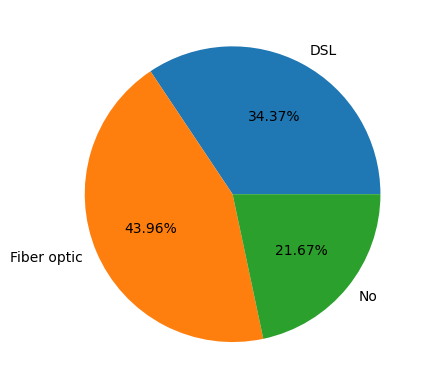

In [16]:
plt.pie(telco_churndf[['InternetService','Churn']].groupby('InternetService').count()['Churn'], autopct = '%0.2f%%', labels = ['DSL','Fiber optic','No'])
plt.show()

<AxesSubplot: xlabel='Churn', ylabel='count'>

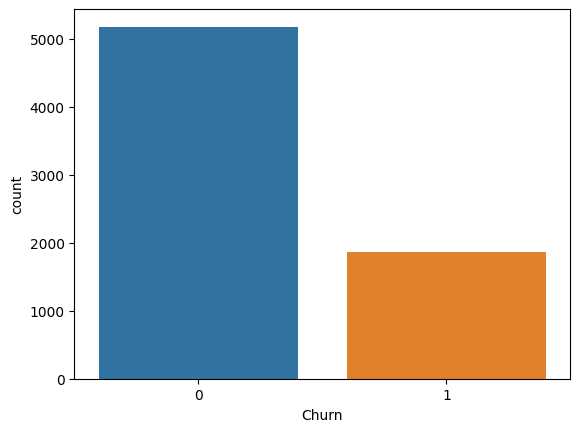

In [17]:
sns.countplot(x = 'Churn', data = telco_churndf)   # Imbalanced Class

In [18]:
telco_churndf['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [19]:
telco_churndf['Churn'].value_counts() / telco_churndf.shape[0]

0    0.73463
1    0.26537
Name: Churn, dtype: float64

#### Data Augmentation
    * To regenerate new input data for training dataset

In [20]:
# handling imbalanced class
df_0 = telco_churndf[telco_churndf['Churn'] == 0]
df_1 = telco_churndf[telco_churndf['Churn'] == 1]

In [21]:
from sklearn.utils import resample
df_1_upsample = resample(df_1, n_samples = 4000, replace = True, random_state = 123)

In [22]:
# Merge samples
telco_churndf1 = pd.concat([df_0, df_1_upsample])

In [23]:
telco_churndf1['Churn'].value_counts() / telco_churndf1.shape[0]

0    0.563985
1    0.436015
Name: Churn, dtype: float64

##### Features & Target

In [24]:
X = telco_churndf1.drop(['customerID','Churn'], axis = 1)
Y = telco_churndf1['Churn']

In [25]:
# Split data into train & test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

#### Decision Tree Model

In [26]:
from sklearn.tree import DecisionTreeClassifier
# criterion = 'entropy' or 'gini', class_weight = percentage of each class, max_depth = maximum depth of decision tree
tree_clf = DecisionTreeClassifier(criterion = 'entropy', class_weight = {0:0.563985, 1:0.436015}, max_depth = 13)

In [27]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.563985, 1: 0.436015},
                       criterion='entropy', max_depth=13)

In [28]:
tree_clf.score(x_test, y_test)

0.8147138964577657

In [29]:
tree_clf.score(x_train, y_train)

0.9223327428805014

In [30]:
tree_clf.get_depth()

13

In [31]:
yhat = tree_clf.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, yhat)

array([[846, 203],
       [137, 649]], dtype=int64)

<AxesSubplot: >

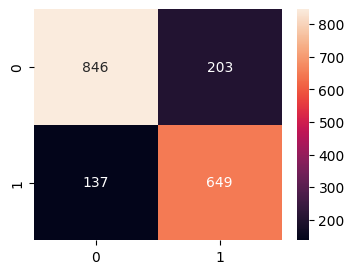

In [33]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_test, yhat), annot = True, fmt='0.0f')

In [34]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1049
           1       0.76      0.83      0.79       786

    accuracy                           0.81      1835
   macro avg       0.81      0.82      0.81      1835
weighted avg       0.82      0.81      0.82      1835



#### Plot Decision Tree

In [35]:
from sklearn import tree
fig = plt.figure(figsize = (200, 50))
_ = tree.plot_tree(tree_clf, feature_names = X.columns, class_names = str(Y), filled = True, rounded = True, fontsize = 8)

In [36]:
from sklearn.ensemble import RandomForestClassifier
# criterion = 'entropy' or 'gini', class_weight = percentage of each class, max_depth = maximum depth of decision tree
# n_estimators = num of decision trees, max_features = num of features allowed
rf_clf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', class_weight = {0:0.563985, 1:0.436015}, max_features = 5)

In [37]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.563985, 1: 0.436015},
                       criterion='entropy', max_features=5, n_estimators=50)

In [38]:
rf_clf.score(x_test, y_test)

0.8697547683923705

In [39]:
rf_clf.score(x_train, y_train)

0.9983648998501158

##### Classification Metrics

In [40]:
yhat = rf_clf.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, yhat)

array([[894, 155],
       [ 84, 702]], dtype=int64)

<AxesSubplot: >

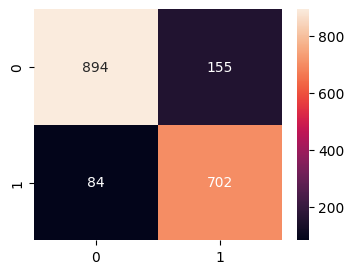

In [42]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_test, yhat), annot = True, fmt='0.0f')

In [43]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1049
           1       0.82      0.89      0.85       786

    accuracy                           0.87      1835
   macro avg       0.87      0.87      0.87      1835
weighted avg       0.87      0.87      0.87      1835

